In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Gold Price (2013-2023).csv")

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [ ]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2583,2583,2583,2583,2583,2578,2583
unique,2583,2072,2061,2044,2019,1550,474
top,12/30/2022,"1,294.30","1,284.00","1,220.00","1,314.00",0.02K,0.00%
freq,1,5,5,6,5,48,29


In [ ]:
data.isnull()

,Date,Price,Open,High,Low,Vol.,Change %
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
2578,False,False,False,False,False,False,False
2579,False,False,False,False,False,False,False
2580,False,False,False,False,False,False,False
2581,False,False,False,False,False,False,False


In [ ]:
data = pd.DataFrame(data)
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,5
Change %,0


In [ ]:
def remove_percentage_sign(value):
    if isinstance(value, str):
        return float(value.replace('%', '')) / 100  # Convert to decimal
    return value
data['Change']= data['Change %'].apply(remove_percentage_sign)

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %,Change
0,2022-12-30,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%,0.0001
1,2022-12-29,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%,0.0056
2,2022-12-28,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%,-0.0040
3,2022-12-27,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%,0.0074
4,2022-12-26,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%,0.0030
...,...,...,...,...,...,...,...,...
2578,2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%,0.0097
2579,2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%,-0.0016
2580,2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%,-0.0153
2581,2013-01-03,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%,-0.0085


In [ ]:
data['Low'] = pd.to_numeric(data['Low'].str.replace(',', ''), errors='coerce')

In [ ]:
data['Low'].fillna(data['Low'].mean(), inplace=True)

<ipython-input-59-501dcc3a9fbb>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,5
Change %,0
Change,0


In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %,Change
0,2022-12-30,"1,826.20","1,821.80","1,832.40",1819.80,107.50K,0.01%,0.0001
1,2022-12-29,"1,826.00","1,812.30","1,827.30",1811.20,105.99K,0.56%,0.0056
2,2022-12-28,"1,815.80","1,822.40","1,822.80",1804.20,118.08K,-0.40%,-0.0040
3,2022-12-27,"1,823.10","1,808.20","1,841.90",1808.00,159.62K,0.74%,0.0074
4,2022-12-26,"1,809.70","1,805.80","1,811.95",1805.55,NaN,0.30%,0.0030
...,...,...,...,...,...,...,...,...
2578,2013-01-08,"1,663.20","1,651.50","1,662.60",1648.80,0.13K,0.97%,0.0097
2579,2013-01-07,"1,647.20","1,657.30","1,663.80",1645.30,0.09K,-0.16%,-0.0016
2580,2013-01-04,"1,649.90","1,664.40","1,664.40",1630.00,0.31K,-1.53%,-0.0153
2581,2013-01-03,"1,675.60","1,688.00","1,689.30",1664.30,0.19K,-0.85%,-0.0085


In [ ]:
data['Vol.'] = data['Vol.'].str.replace('K', '').astype(float) * 1000
data['Vol.'].fillna(data['Vol.'].mean(), inplace=True)

<ipython-input-62-2251b50f67c0>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %,Change
0,2022-12-30,"1,826.20","1,821.80","1,832.40",1819.80,107500.000000,0.01%,0.0001
1,2022-12-29,"1,826.00","1,812.30","1,827.30",1811.20,105990.000000,0.56%,0.0056
2,2022-12-28,"1,815.80","1,822.40","1,822.80",1804.20,118080.000000,-0.40%,-0.0040
3,2022-12-27,"1,823.10","1,808.20","1,841.90",1808.00,159620.000000,0.74%,0.0074
4,2022-12-26,"1,809.70","1,805.80","1,811.95",1805.55,94046.799845,0.30%,0.0030
...,...,...,...,...,...,...,...,...
2578,2013-01-08,"1,663.20","1,651.50","1,662.60",1648.80,130.000000,0.97%,0.0097
2579,2013-01-07,"1,647.20","1,657.30","1,663.80",1645.30,90.000000,-0.16%,-0.0016
2580,2013-01-04,"1,649.90","1,664.40","1,664.40",1630.00,310.000000,-1.53%,-0.0153
2581,2013-01-03,"1,675.60","1,688.00","1,689.30",1664.30,190.000000,-0.85%,-0.0085


In [ ]:
data.drop(data.columns[-2], axis=1, inplace=True)

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change
0,2022-12-30,"1,826.20","1,821.80","1,832.40",1819.80,107500.000000,0.0001
1,2022-12-29,"1,826.00","1,812.30","1,827.30",1811.20,105990.000000,0.0056
2,2022-12-28,"1,815.80","1,822.40","1,822.80",1804.20,118080.000000,-0.0040
3,2022-12-27,"1,823.10","1,808.20","1,841.90",1808.00,159620.000000,0.0074
4,2022-12-26,"1,809.70","1,805.80","1,811.95",1805.55,94046.799845,0.0030
...,...,...,...,...,...,...,...
2578,2013-01-08,"1,663.20","1,651.50","1,662.60",1648.80,130.000000,0.0097
2579,2013-01-07,"1,647.20","1,657.30","1,663.80",1645.30,90.000000,-0.0016
2580,2013-01-04,"1,649.90","1,664.40","1,664.40",1630.00,310.000000,-0.0153
2581,2013-01-03,"1,675.60","1,688.00","1,689.30",1664.30,190.000000,-0.0085


In [ ]:
import plotly.graph_objects as go

In [ ]:
# Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                       open=data['Open'],
                                       high=data['High'],
                                       low=data['Low'],
                                       close=data['Price'])])
fig.update_layout(title='Candlestick Chart', xaxis_title='Year', yaxis_title='Price')
fig.show()

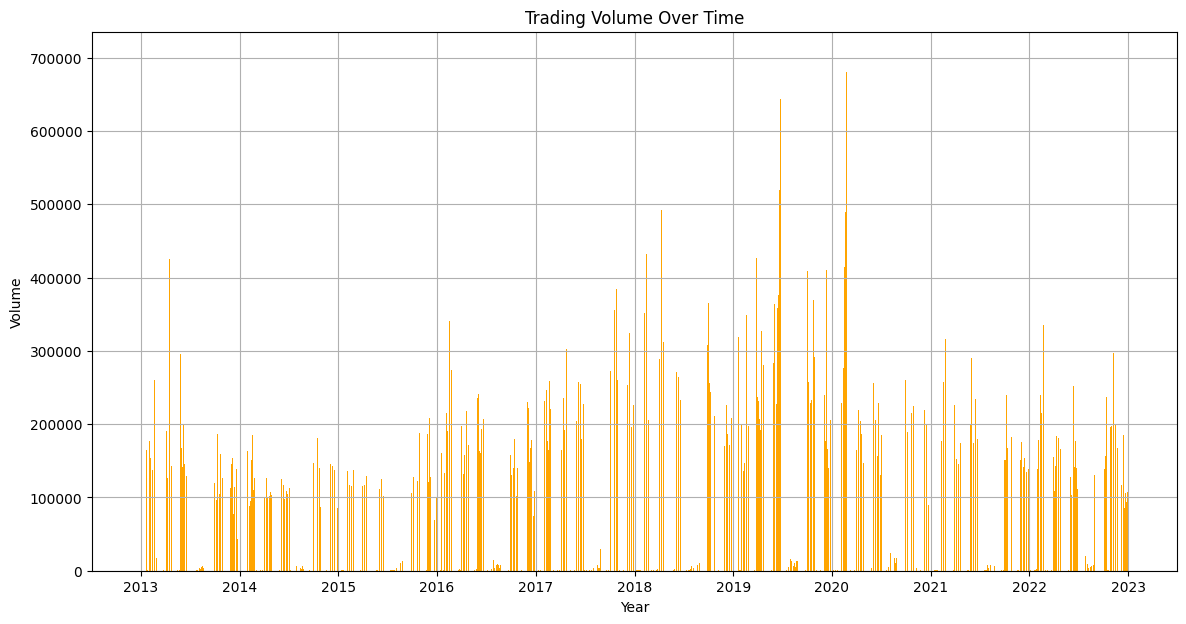

In [ ]:
# Volume Bar Chart
plt.figure(figsize=(14, 7))
plt.bar(data['Date'], data['Vol.'], color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.grid()
plt.show()

In [ ]:
# Create a line chart for Price Trends
price_fig = go.Figure()
price_fig.add_trace(go.Scatter(x=data['Date'], y=data['Price'], mode='lines', name='Price', line=dict(color='blue')))
price_fig.update_layout(title='Price Trend Over Time', xaxis_title='Date', yaxis_title='Price')
price_fig.show()


In [ ]:
# Create a volume bar chart
volume_fig = go.Figure()
volume_fig.add_trace(go.Bar(x=data['Date'], y=data['Vol.'], name='Volume', marker_color='red'))
volume_fig.update_layout(title='Trading Volume Over Time', xaxis_title='Date', yaxis_title='Volume')
volume_fig.show()

In [ ]:
# Create a change percentage line chart
change_fig = go.Figure()
change_fig.add_trace(go.Scatter(x=data['Date'], y=data['Change'], mode='lines', name='Change (%)', line=dict(color='green')))
change_fig.update_layout(title='Daily Change Percentage', xaxis_title='Date', yaxis_title='Change (%)')
change_fig.show()

In [ ]:
# Create a histogram of daily changes
hist_fig = go.Figure()
hist_fig.add_trace(go.Histogram(x=data['Change'], nbinsx=30, name='Daily Change', marker_color='purple'))
hist_fig.update_layout(title='Histogram of Daily Percentage Changes', xaxis_title='Change (%)', yaxis_title='Frequency')
hist_fig.show()

In [ ]:
# Create a scatter plot of Volume vs. Price
scatter_fig = go.Figure()
scatter_fig.add_trace(go.Scatter(x=data['Vol.'], y=data['Price'], mode='markers', marker=dict(color='blue', size=10)))
scatter_fig.update_layout(title='Scatter Plot: Volume vs. Price', xaxis_title='Volume', yaxis_title='Price')
scatter_fig.show()

In [ ]:
# Create a box plot for price distribution
box_fig = go.Figure()
box_fig.add_trace(go.Box(y=data['Price'], name='Price Distribution', marker_color='lightgreen'))
box_fig.update_layout(title='Box Plot of Price Distribution', yaxis_title='Price')
box_fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor



# Remove commas and convert to float
numeric_columns = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change']
for col in numeric_columns:
    data[col] = data[col].replace(',', '', regex=True).astype(float)

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Feature Engineering
data['Price_Lag1'] = data['Price'].shift(1)
data['Price_Lag2'] = data['Price'].shift(2)
data['Volume_Lag1'] = data['Vol.'].shift(1)
data['MA_5'] = data['Price'].rolling(window=5).mean()
data['MA_10'] = data['Price'].rolling(window=10).mean()
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Day_of_Week'] = data['Date'].dt.dayofweek
data['Returns'] = data['Price'].pct_change()

# Drop NaN values after feature creation
data.dropna(inplace=True)

# Define features and target variable
X = data[['Price_Lag1', 'Price_Lag2', 'Volume_Lag1', 'MA_5', 'MA_10',
           'Day', 'Month', 'Year', 'Day_of_Week', 'Returns']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaler and model
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Function to predict future price for a given year
def predict_future_price(year):
    # Create a new dataframe with the input year
    input_data = pd.DataFrame({'Year': [year], 'Month': [1], 'Day': [1]})

    # Create lagged features for the input year
    price_lag1 = data['Price'].iloc[-1]
    price_lag2 = data['Price'].iloc[-2]
    volume_lag1 = data['Vol.'].iloc[-1]

    # Prepare the input features
    input_features = np.array([[price_lag1, price_lag2, volume_lag1,
                                 data['MA_5'].iloc[-1], data['MA_10'].iloc[-1],
                                 1, 1, year, 0, data['Returns'].iloc[-1]]])

    # Predict the price for the input year
    predicted_price = pipeline.predict(input_features)[0]

    return predicted_price

# Get user input for the year
year_input = int(input("Enter the year you want to predict the price for: "))

# Predict and display the price
predicted_price = predict_future_price(year_input)

print(f'Predicted price for {year_input}: {predicted_price:.2f}')

Enter the year you want to predict the price for: 2026
Predicted price for 2026: 1701.79


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

